# Congestion Relief Zone Data Analysis
Dylan Mondrus and Ryan Fenner

[GitHub Webpage](https://dylanmondrus.github.io)

# Project Goals

The objective of this project is to assess the impact of the 2025 implementation of New York City's Congestion Relief Zone on traffic congestion south of 60th Street.

Essential Questions:


*   Has the Congestion Relief Zone accomplished its goal of reducing overall traffic congestion in lower Manhattan?
*   What regions have seen the most relief?
*   What trends about NYC traffic over time can we identify to predict the growth of traffic in the future?





# Collaboration Plan

Our collaboration plan is to meet at the library once a week to continue towards completion on the final project. We have created and shared a google colab to work on and update our code together. From now until April 18th we will manipulate and extract this data to make a scientically sound prediction about the traffic trends and hopefully find an answer to our core question. From April 18 to May 8th we will develop our presentation using the key graphs and insights found during the ETL phase.

## **DATA COLLECTION**

# Project Dataset

The data we are interested in working with currently is all the data associated with the implementation of the Congestion Relief Zone implemented in January 2025 in New York City. The [MTA Congestion Relief Zone Vehicle Entries: Beginning 2025](https://data.ny.gov/Transportation/MTA-Congestion-Relief-Zone-Vehicle-Entries-Beginni/t6yz-b64h/about_data) provided by the MTA's database provides a detailed and lengthy dataset.I have accessed the data collected by the MTA from the first day of implementation, 01/05/25 to 3/11/25, which details the number of entries into the zone at a given time, the location of detection, and the vehicle class. This dataset is pefect for tracking the trend of entries into the zone over the course of the timeline since it's been implemented. We also have the traffic volume from the [Traffic Volume Counts](https://data.cityofnewyork.us/Transportation/Traffic-Volume-Counts/btm5-ppia/about_data) dataset created by the Department of Transportation. It has traffic camera detection data from 2012 to 2020, containing the location and time the vechile was captured.

This may help answer questions like: How has rush hour traffic changed since its implementation? How much has traffic volume changed since its implementation? Which entry points have increased their traffic volume since its implementation?


These datasets contain valuable traffic data from 2012 to 2020, and from early 2025. The 5 year gap in between does put a hitch in our analysis since many events and trends have emerged in that time period. The population of New York has increased, the global pandemic affected traffic trends, and many construction projects began in lower Manhattan that would have produced changes in the overall traffic volume of New York that are otherwise unseen and unrecorded. While this data would have put more accuracy to our predictions, it did not dramatically affect the data science process and I was still able to utilize the data to its full extent.

We currently have 2 dataset excel files loaded. The 2025 post-congestion zone dataset, and the total traffic volume data prior to 2022. The 2025 dataset contains exact time of tole, vehicle class, entry location, entry region, CRZ entries, and excluded roadway entries. The total traffic dataset contains exact location of detection, direction, and amount of vehicles detected.

# **ETL(Extraction, Transformation, Loading)**

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/dylanmondrus/dylanmondrus.github.io



Cloning into 'dylanmondrus.github.io'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 21 (delta 3), reused 20 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (21/21), 5.03 MiB | 6.72 MiB/s, done.
Resolving deltas: 100% (3/3), done.


This is the first visualization I produced to show, in general, the trend of entries over time. Since the dataset is relatively new, the short number of data makes this easy to view and show clear patterns, like the drop in entries during the weekends. Additionally, we stored the datasets in our GitHub repository as they were too big to store in Google Drive and actually had to be stored as raw files as they exceeded 50MB.

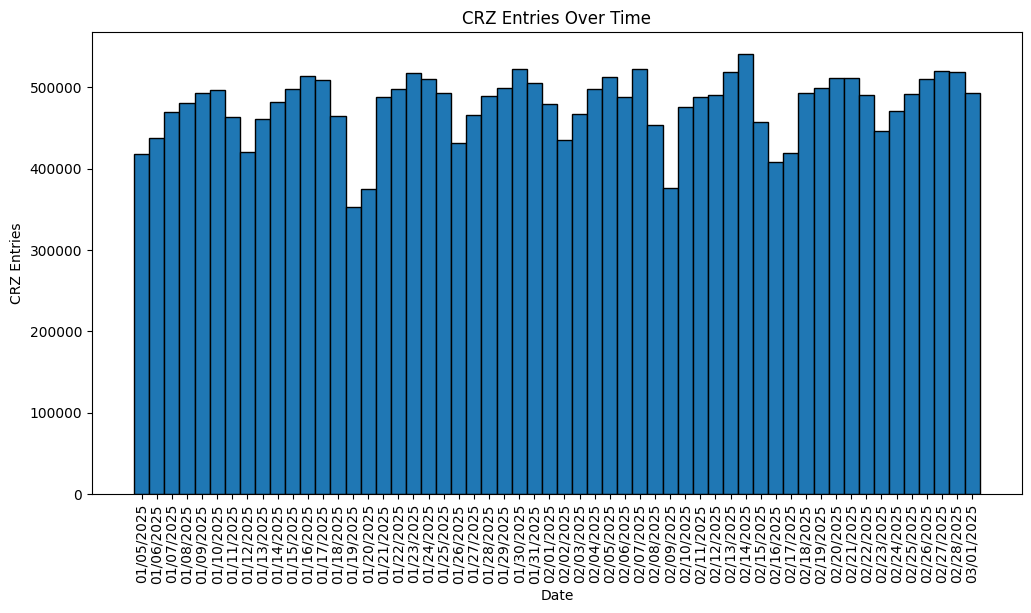

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


CRZ_df = pd.read_csv("https://raw.githubusercontent.com/dylanmondrus/dylanmondrus.github.io/refs/heads/main/MTA_Congestion_Relief_Zone_Vehicle_Entries__Beginning_2025_20250311.csv")
CRZ_grouped = CRZ_df.groupby('Toll Date')['CRZ Entries'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(CRZ_grouped['Toll Date'], CRZ_grouped['CRZ Entries'], width=1.0, edgecolor='black')

plt.xlabel('Date')
plt.ylabel('CRZ Entries')
plt.title('CRZ Entries Over Time')
plt.xticks(rotation=90)

plt.show()

In [ ]:
traffic_df = pd.read_csv("https://raw.githubusercontent.com/dylanmondrus/dylanmondrus.github.io/refs/heads/main/Traffic_Volume_Counts_20250311.csv")
traffic_df.head()

,ID,SegmentID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
0,1,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/09/2012,20.0,10.0,11.0,...,104.0,105.0,147.0,120.0,91.0,83.0,74.0,49.0,42.0,42.0
1,2,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/10/2012,21.0,16.0,8.0,...,102.0,98.0,133.0,131.0,95.0,73.0,70.0,63.0,42.0,35.0
2,3,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/11/2012,27.0,14.0,6.0,...,115.0,115.0,130.0,143.0,106.0,89.0,68.0,64.0,56.0,43.0
3,4,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/12/2012,22.0,7.0,7.0,...,71.0,127.0,122.0,144.0,122.0,76.0,64.0,58.0,64.0,43.0
4,5,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/13/2012,31.0,17.0,7.0,...,113.0,126.0,133.0,135.0,102.0,106.0,58.0,58.0,55.0,54.0


In [ ]:
import pandas as pd
CRZ_df.head()

,Toll Date,Toll Hour,Toll 10 Minute Block,Minute of Hour,Hour of Day,Day of Week Int,Day of Week,Toll Week,Time Period,Vehicle Class,Detection Group,Detection Region,CRZ Entries,Excluded Roadway Entries
0,03/01/2025,03/01/2025 11:00:00 PM,03/01/2025 11:50:00 PM,50,23,7,Saturday,02/23/2025,Overnight,4 - Buses,Brooklyn Bridge,Brooklyn,0,0
1,03/01/2025,03/01/2025 11:00:00 PM,03/01/2025 11:50:00 PM,50,23,7,Saturday,02/23/2025,Overnight,TLC Taxi/FHV,West Side Highway at 60th St,West Side Highway,138,1
2,03/01/2025,03/01/2025 11:00:00 PM,03/01/2025 11:50:00 PM,50,23,7,Saturday,02/23/2025,Overnight,TLC Taxi/FHV,West 60th St,West 60th St,201,0
3,03/01/2025,03/01/2025 11:00:00 PM,03/01/2025 11:50:00 PM,50,23,7,Saturday,02/23/2025,Overnight,TLC Taxi/FHV,Queensboro Bridge,Queens,83,0
4,03/01/2025,03/01/2025 11:00:00 PM,03/01/2025 11:50:00 PM,50,23,7,Saturday,02/23/2025,Overnight,TLC Taxi/FHV,Queens Midtown Tunnel,Queens,119,0


In [ ]:
min_entry_index = CRZ_grouped['CRZ Entries'].idxmin()

min_entry_date = CRZ_grouped.loc[min_entry_index, 'Toll Date']
min_entry_value = CRZ_grouped.loc[min_entry_index, 'CRZ Entries']

print(f"Date with the least CRZ entries: {min_entry_date}")
print(f"Total entries on this day: {min_entry_value}")


Date with the least CRZ entries: 01/19/2025
Total entries on this day: 352701


# Interesting statistics
- The day with the least amount of entries into the CRZ was Sunday, January 19th.
- The average entries into the CRZ per day is 477,525.
- The detection region with the most entries is Brookyln. This means that Brooklyn has more people driving into lower manhattan than any other region.


# **EDA(Exploratory Data Analysis & Visualization)**

# Before and After Data Comparison

In the total traffic volume dataset, we are able to view the traffic of the entire city of New York. We will filter this to have data similar to the congestion zone dataset, and we will be able to compare the entry data between the two datasets.

# Dataset Comparison

An issue with the total traffic dataset is that the detection locations don't match up with those in the CRZ dataset. We can only analyze data at locations that are included in the CRZ, so we have to filter the locations. This is so we can see which locations in the total traffic dataset to isolate.

In [ ]:
CRZ_street_group = CRZ_df["Detection Group"]
CRZ_street_group.unique()

array(['Brooklyn Bridge', 'West Side Highway at 60th St', 'West 60th St',
       'Queensboro Bridge', 'Queens Midtown Tunnel', 'Lincoln Tunnel',
       'Holland Tunnel', 'FDR Drive at 60th St', 'East 60th St',
       'Williamsburg Bridge', 'Manhattan Bridge', 'Hugh L. Carey Tunnel'],
      dtype=object)

This is important and specific filtering. The post-CRZ dataset only counts traffic at a few entry points, much less than the total traffic dataset, and also only within the CRZ. Therefore we have to cutdown the total traffic dataset to align the data better and show a clearer picture of the success of the CRZ. This script establishes keywords for roads in the CRZ that may have alternate syntax in the other dataset. It then returns the total traffic data only with roads that have these keywords.

In [ ]:
# Define entry point-related keywords to identify relevant segments
entry_point_keywords = {
    'Brooklyn Bridge': ['BROOKLYN BRIDGE', 'PARK ROW', 'CENTRE ST', 'CITY HALL', 'FRANKFORT ST'],
    'East 60th St': ['E 60', 'EAST 60'],
    'FDR Drive at 60th St': ['FDR', 'FDR DRIVE', 'FDR DR'],
    'Holland Tunnel': ['HOLLAND TUNNEL', 'CANAL ST', 'VARICK ST'],
    'Hugh L. Carey Tunnel': ['CAREY TUNNEL', 'BATTERY TUNNEL', 'HUGH L', 'I-478', 'TRINITY PL'],
    'Lincoln Tunnel': ['LINCOLN TUNNEL', 'DYER AVE', 'W 39 ST', 'LINCOLN'],
    'Manhattan Bridge': ['MANHATTAN BRIDGE', 'CANAL ST', 'BOWERY'],
    'Queens Midtown Tunnel': ['MIDTOWN TUNNEL', 'QUEENS MIDTOWN', 'TUNNEL ENTRANCE', '34TH ST', '2 AVE'],
    'Queensboro Bridge': ['QUEENSBORO', '59 ST BRIDGE', 'QUEENS PLAZA', 'E 59 ST'],
    'West 60th St': ['W 60', 'WEST 60', '60TH ST'],
    'West Side Highway at 60th St': ['WEST SIDE HWY', 'WEST SIDE HIGHWAY', 'RTE 9A', '12TH AVE', 'HENRY HUDSON'],
    'Williamsburg Bridge': ['WILLIAMSBURG BRIDGE', 'DELANCEY ST', 'CLINTON ST']
}


def matches_entry_point(row):
    text = f"{row['Roadway Name']} {row['From']} {row['To']}".upper()
    return any(any(kw in text for kw in kws) for kws in entry_point_keywords.values())

# Filter your full traffic_df to get only rows related to CRZ entry points
traffic_entry_points = traffic_df[traffic_df.apply(matches_entry_point, axis=1)].copy()


This is concatenating the datasets now that they have the same location data and combining them into a new dataset containing only essential columns like the count, date, day of the week, location, and original dataset.

In [ ]:
def identify_entry_point(row):
    text = f"{row['Roadway Name']} {row['From']} {row['To']}".upper()
    for label, keywords in entry_point_keywords.items():
        if any(kw in text for kw in keywords):
            return label
    return None

# Clean traffic entry data
traffic_entry_points['Location'] = traffic_entry_points.apply(identify_entry_point, axis=1)
traffic_entry_points = traffic_entry_points.dropna(subset=['Location'])

time_cols = [col for col in traffic_entry_points.columns if ':' in col or 'AM' in col or 'PM' in col]
traffic_entry_points['Count'] = traffic_entry_points[time_cols].sum(axis=1, skipna=True)
traffic_entry_points['Date'] = pd.to_datetime(traffic_entry_points['Date'], errors='coerce')
traffic_entry_points['Day of Week'] = traffic_entry_points['Date'].dt.day_name()
traffic_entry_points['Date'] = traffic_entry_points['Date'].dt.strftime('%m/%d/%Y')
traffic_entry_points['Source'] = 'Traffic Entry Points'

traffic_final_clean = traffic_entry_points[['Date', 'Location', 'Day of Week', 'Count', 'Source']]

# Clean CRZ_df
CRZ_df = CRZ_df.copy()
crz_clean = CRZ_df[['Toll Date', 'Detection Group', 'Day of Week', 'CRZ Entries']].copy()
crz_clean.columns = ['Date', 'Location', 'Day of Week', 'Count']
crz_clean['Source'] = 'CRZ Dataset'

combined_crz_traffic_filtered = pd.concat([traffic_final_clean, crz_clean], ignore_index=True)
combined_crz_traffic_filtered.head()


,Date,Location,Day of Week,Count,Source
0,01/09/2012,Williamsburg Bridge,Monday,6022.0,Traffic Entry Points
1,01/10/2012,Williamsburg Bridge,Tuesday,6130.0,Traffic Entry Points
2,01/11/2012,Williamsburg Bridge,Wednesday,6179.0,Traffic Entry Points
3,01/12/2012,Williamsburg Bridge,Thursday,6198.0,Traffic Entry Points
4,01/13/2012,Williamsburg Bridge,Friday,6591.0,Traffic Entry Points


We are now beginning to visualize the new dataframe. This cleans the data and shows a histogram representing the number of vehicles at each entry location with each dataset side by side to represent a before and after effect of the CRZ. FDR Drive at 60th, Queens midtown tunnel, and West Side Highway at 60th street have seen massive reductions in traffic volume.

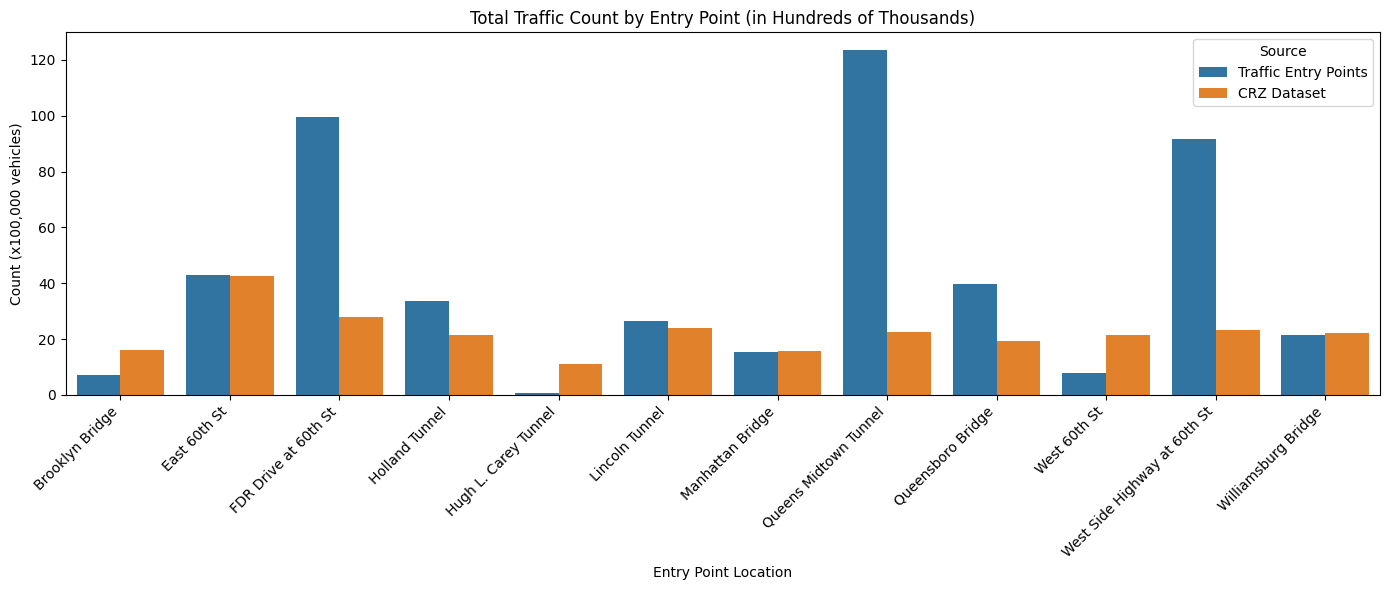

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure Count is numeric
combined_crz_traffic_filtered['Count'] = pd.to_numeric(combined_crz_traffic_filtered['Count'], errors='coerce')

# Remove missing or zero counts
filtered_plot_df = combined_crz_traffic_filtered[
    combined_crz_traffic_filtered['Count'].notna() & (combined_crz_traffic_filtered['Count'] > 0)
].copy()

# Group and scale count
hist_data = filtered_plot_df.groupby(['Location', 'Source'])['Count'].sum().reset_index()
hist_data['Count'] = hist_data['Count'] / 100_000  # scale to hundreds of thousands

# Reverse hue order: Pre-CRZ (left), Post-CRZ (right)
plt.figure(figsize=(14, 6))
sns.barplot(
    data=hist_data,
    x='Location',
    y='Count',
    hue='Source',
    hue_order=['Traffic Entry Points', 'CRZ Dataset']  # reverse the hue order
)

plt.title('Total Traffic Count by Entry Point (in Hundreds of Thousands)')
plt.xlabel('Entry Point Location')
plt.ylabel('Count (x100,000 vehicles)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


This is basically the same plot as before but shows the data as a percentage of total traffic volume rather than raw amount. The distribution of traffic is easier to see and it's more apparent the change to each entrance.

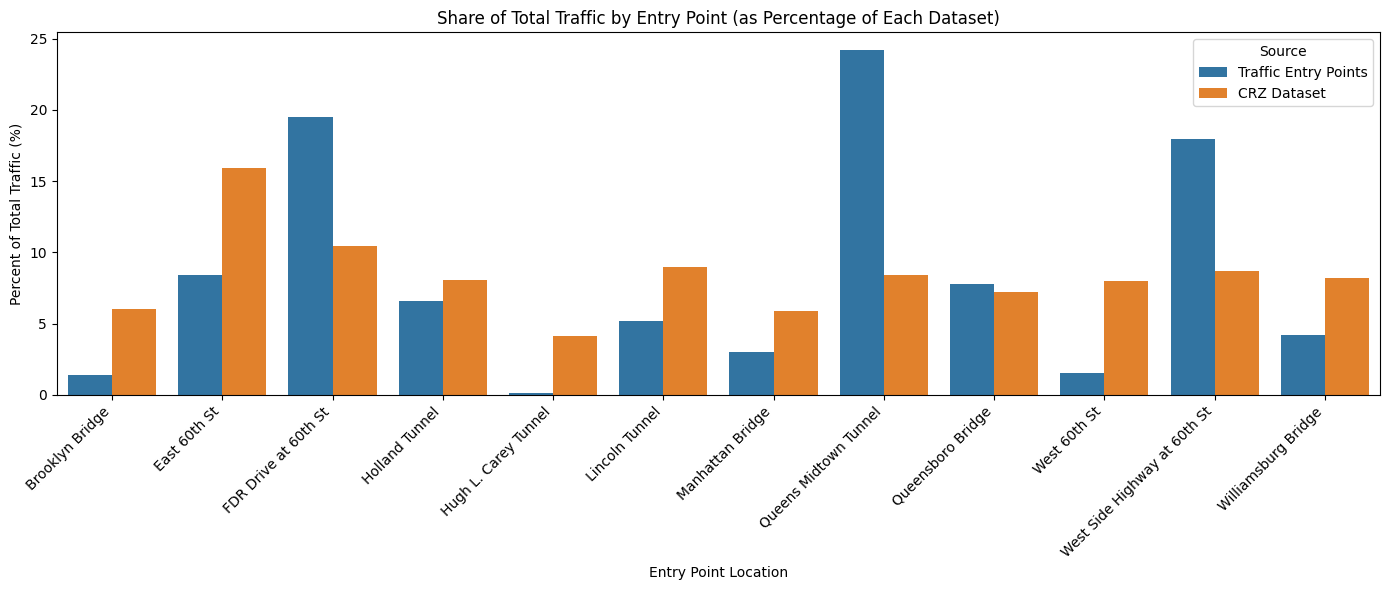

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure 'Count' is numeric
combined_crz_traffic_filtered['Count'] = pd.to_numeric(combined_crz_traffic_filtered['Count'], errors='coerce')

# Filter valid rows
filtered_plot_df = combined_crz_traffic_filtered[
    combined_crz_traffic_filtered['Count'].notna() & (combined_crz_traffic_filtered['Count'] > 0)
].copy()

# Group by Location and Source
hist_data = filtered_plot_df.groupby(['Location', 'Source'])['Count'].sum().reset_index()

# Compute percentage of total traffic per source (pre/post CRZ)
hist_data['Percent'] = hist_data['Count'] / hist_data.groupby('Source')['Count'].transform('sum') * 100

# Plot with reversed hue order
plt.figure(figsize=(14, 6))
sns.barplot(
    data=hist_data,
    x='Location',
    y='Percent',
    hue='Source',
    hue_order=['Traffic Entry Points', 'CRZ Dataset']  # reversed order
)

plt.title('Share of Total Traffic by Entry Point (as Percentage of Each Dataset)')
plt.xlabel('Entry Point Location')
plt.ylabel('Percent of Total Traffic (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


note for later: heatmap/density map of manhattan

This is a scaled line chart which shows the total traffic volume over time(locations not specified) so the spikes are easier to see. There was a big spike in 2014 and a few more spikes after that, possibly the result of major construction projects in the area, or a spike in data collection. The post-CRZ data shows a trend of traffic increasing during the week, and dipping on the weekends since people don't go out as much.

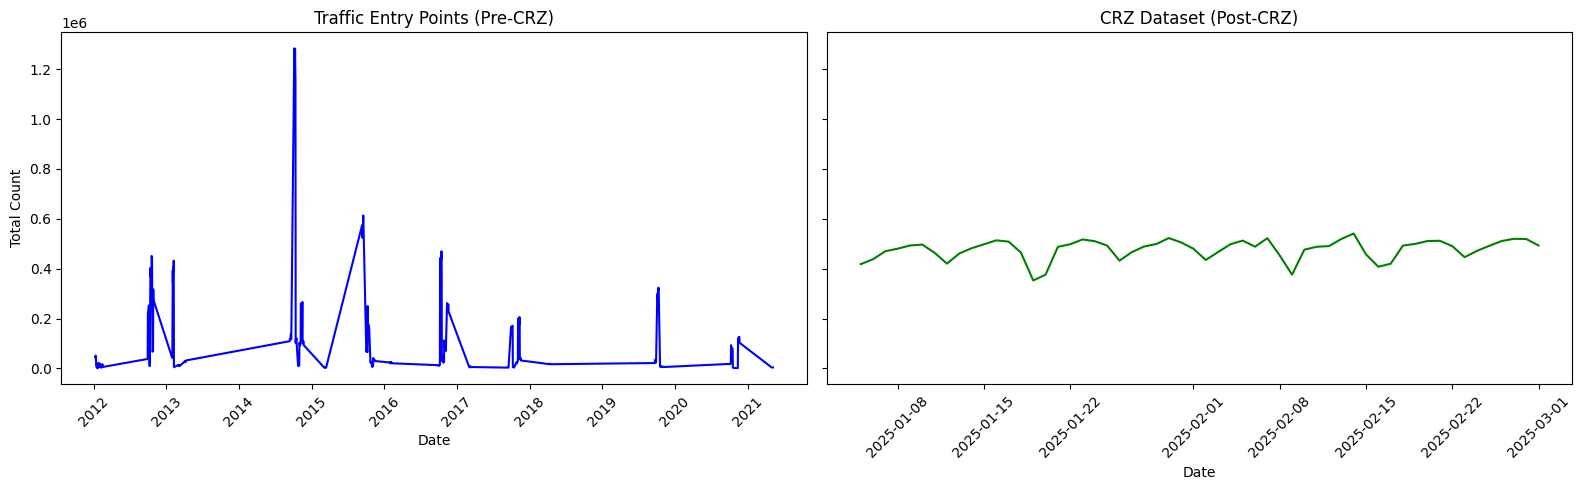

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure date and count are clean
combined_crz_traffic_filtered['Date'] = pd.to_datetime(combined_crz_traffic_filtered['Date'], errors='coerce')
combined_crz_traffic_filtered['Count'] = pd.to_numeric(combined_crz_traffic_filtered['Count'], errors='coerce')

# Filter for clean data
plot_df = combined_crz_traffic_filtered[
    combined_crz_traffic_filtered['Count'].notna() & (combined_crz_traffic_filtered['Count'] > 0)
].copy()

# Group by date and source (daily aggregation)
plot_df = plot_df.groupby(['Date', 'Source'])['Count'].sum().reset_index()

# Separate into two datasets
pre_crz_df = plot_df[plot_df['Source'] == 'Traffic Entry Points']
post_crz_df = plot_df[plot_df['Source'] == 'CRZ Dataset']

# Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 5), sharey=True)

# Line chart for pre-CRZ
axes[0].plot(pre_crz_df['Date'], pre_crz_df['Count'], label='Pre-CRZ', color='blue')
axes[0].set_title('Traffic Entry Points (Pre-CRZ)')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Total Count')
axes[0].tick_params(axis='x', rotation=45)

# Line chart for post-CRZ
axes[1].plot(post_crz_df['Date'], post_crz_df['Count'], label='Post-CRZ', color='green')
axes[1].set_title('CRZ Dataset (Post-CRZ)')
axes[1].set_xlabel('Date')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


This is the same chart but again as a percentage of total volume.

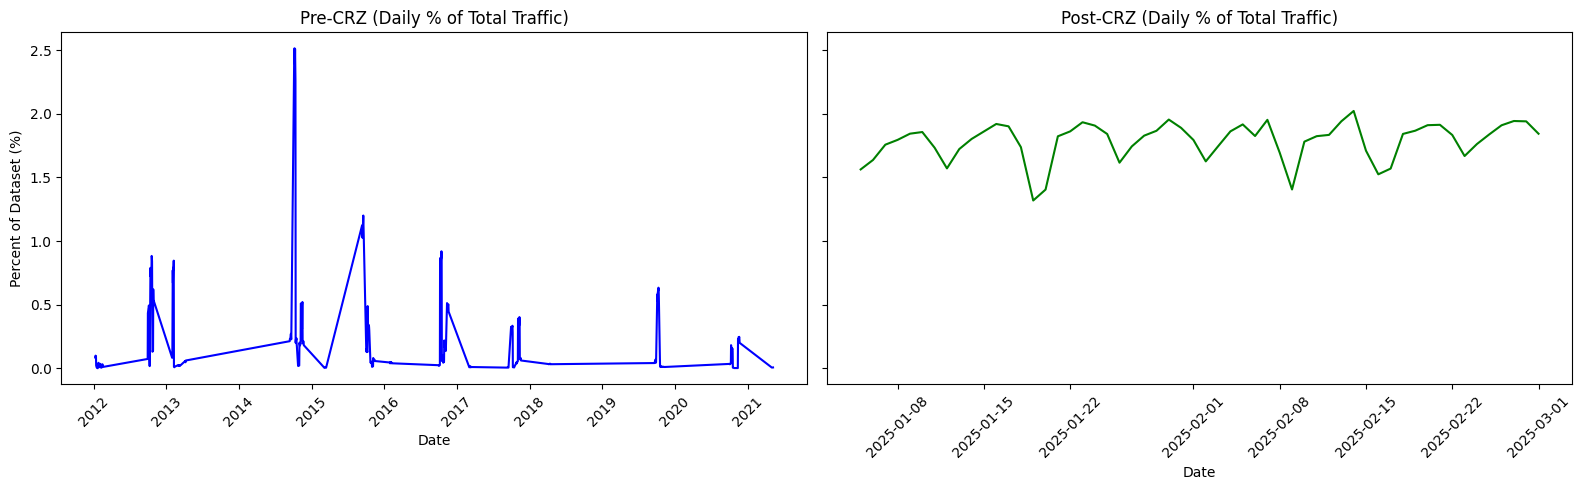

This is the same histogram as before but they're separate instead of together. The point is to show the traffic trends individually within each time period and together to give a "before and after" effect.

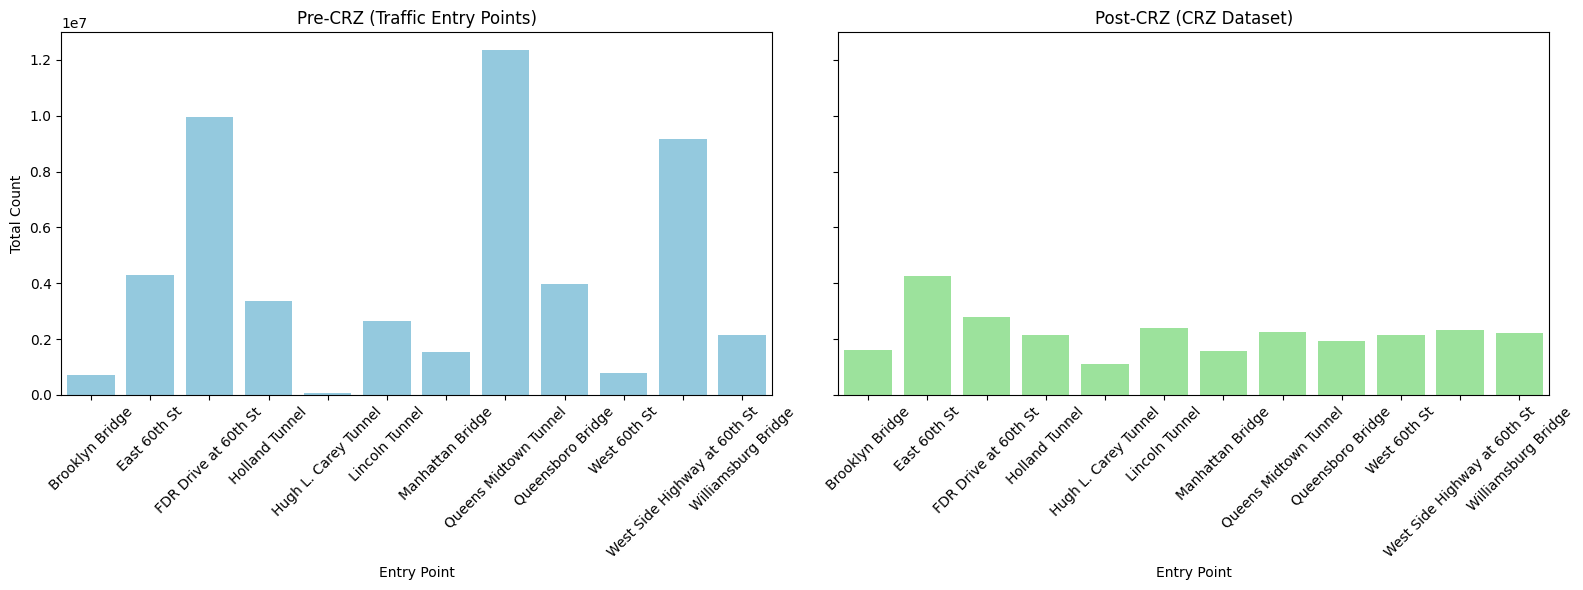

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Ensure data is clean
combined_crz_traffic_filtered['Count'] = pd.to_numeric(combined_crz_traffic_filtered['Count'], errors='coerce')
combined_crz_traffic_filtered = combined_crz_traffic_filtered[
    combined_crz_traffic_filtered['Count'].notna() & (combined_crz_traffic_filtered['Count'] > 0)
].copy()

# Split datasets
pre_crz_df = combined_crz_traffic_filtered[combined_crz_traffic_filtered['Source'] == 'Traffic Entry Points']
post_crz_df = combined_crz_traffic_filtered[combined_crz_traffic_filtered['Source'] == 'CRZ Dataset']

# Aggregate by location
pre_crz_counts = pre_crz_df.groupby('Location')['Count'].sum().reset_index()
post_crz_counts = post_crz_df.groupby('Location')['Count'].sum().reset_index()

# Plot side-by-side histograms
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Pre-CRZ histogram
sns.barplot(data=pre_crz_counts, x='Location', y='Count', ax=axes[0], color='skyblue')
axes[0].set_title('Pre-CRZ (Traffic Entry Points)')
axes[0].set_ylabel('Total Count')
axes[0].set_xlabel('Entry Point')
axes[0].tick_params(axis='x', rotation=45)

# Post-CRZ histogram
sns.barplot(data=post_crz_counts, x='Location', y='Count', ax=axes[1], color='lightgreen')
axes[1].set_title('Post-CRZ (CRZ Dataset)')
axes[1].set_ylabel('')  # shared y-axis
axes[1].set_xlabel('Entry Point')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Pie chart showing the distribution of traffic across the entry points for each time period. The interesting part is that the distribution of entries has evened out dramatically. For example, Queens Midtown Tunnel is a major bottleneck which connects Queens to Midtown, a huge point of entry. The percentage of entries decreased from 24.2% to 8.4%, signaling a massive reduction in bottlenecking and congestion at that point.

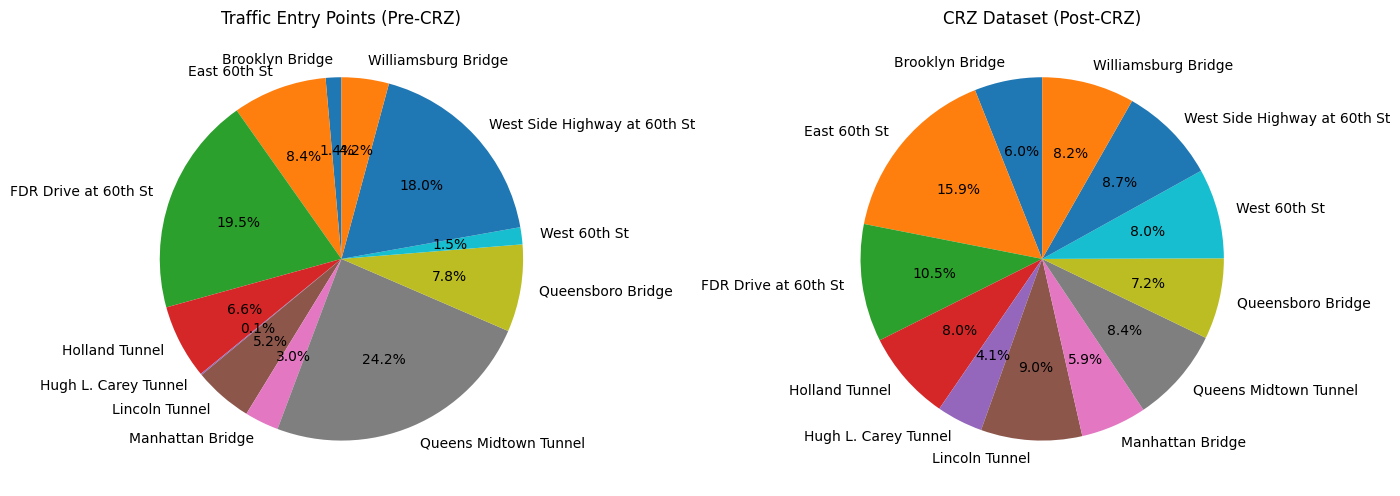

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure numeric count
combined_crz_traffic_filtered['Count'] = pd.to_numeric(combined_crz_traffic_filtered['Count'], errors='coerce')

# Filter clean rows
pie_df = combined_crz_traffic_filtered[
    combined_crz_traffic_filtered['Count'].notna() & (combined_crz_traffic_filtered['Count'] > 0)
].copy()

# Group by Location and Source
pie_data = pie_df.groupby(['Location', 'Source'])['Count'].sum().reset_index()

# Split into the two datasets
pre_crz_data = pie_data[pie_data['Source'] == 'Traffic Entry Points']
post_crz_data = pie_data[pie_data['Source'] == 'CRZ Dataset']

# Plot two pie charts
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Pre-CRZ pie
axes[0].pie(pre_crz_data['Count'], labels=pre_crz_data['Location'], autopct='%1.1f%%', startangle=90)
axes[0].set_title('Traffic Entry Points (Pre-CRZ)')

# Post-CRZ pie
axes[1].pie(post_crz_data['Count'], labels=post_crz_data['Location'], autopct='%1.1f%%', startangle=90)
axes[1].set_title('CRZ Dataset (Post-CRZ)')

plt.tight_layout()
plt.show()


This chart that can help us understand the effect of the CRZ. This is the total traffic entries over time, meshed between time periods and scaled. This can show us if traffic volume has decreased since the CRZ was implemented. The time mesh isn't super clean because of the time gap, but it clearly shows the trend. The trend in the pre-2020 data is similar to the line chart above, while the post-2025 data shows a huge spike, followed by a plateau and a slight decrease. This spike can be attributed to a difference in data density as the CRZ dataset has about 500,000 more rows than the pre-2020 one. However, the plateau and slight decrease signals that there may be an actual effect of the new policy.

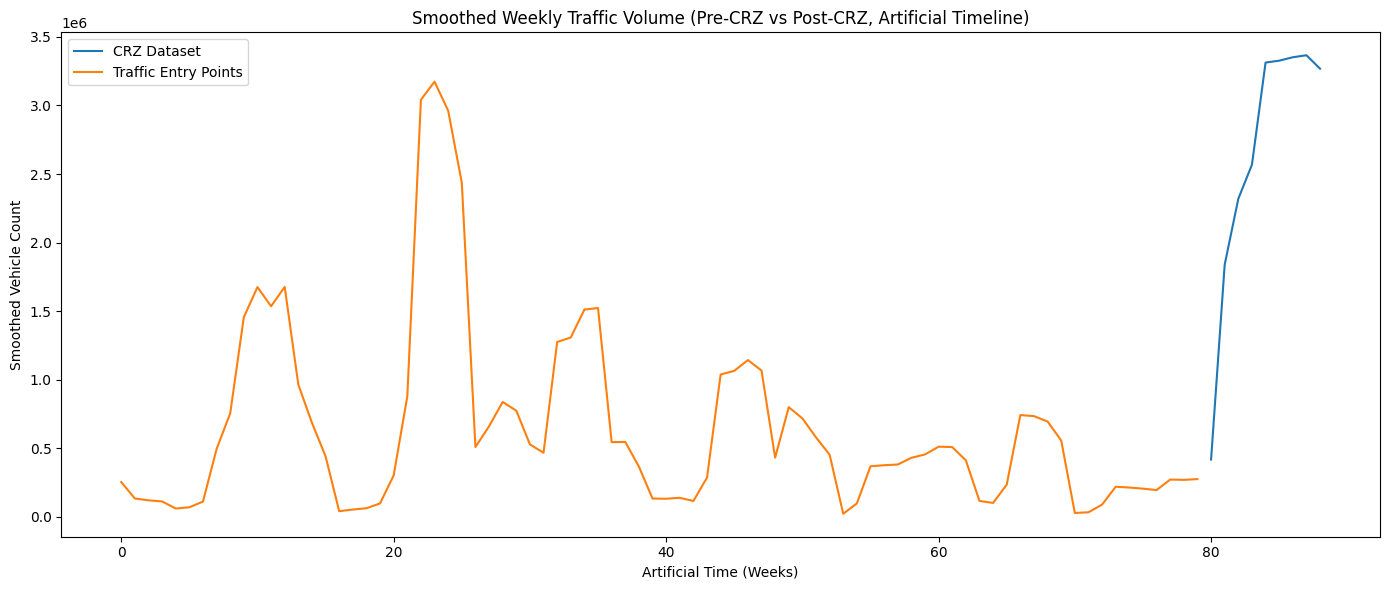

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure datetime and numeric values are clean
combined_crz_traffic_filtered['Date'] = pd.to_datetime(combined_crz_traffic_filtered['Date'], errors='coerce')
combined_crz_traffic_filtered['Count'] = pd.to_numeric(combined_crz_traffic_filtered['Count'], errors='coerce')

# Drop bad data
volume_df = combined_crz_traffic_filtered[
    combined_crz_traffic_filtered['Count'].notna() & (combined_crz_traffic_filtered['Count'] > 0)
].copy()

# Group to weekly totals
weekly_totals = volume_df.groupby(['Source', pd.Grouper(key='Date', freq='W')])['Count'].sum().reset_index()

# Apply rolling average to smooth (window of 4 weeks)
weekly_totals['Smoothed'] = weekly_totals.groupby('Source')['Count'].transform(lambda x: x.rolling(window=4, min_periods=1).mean())

# Assign artificial index for visual continuity
pre_crz = weekly_totals[weekly_totals['Source'] == 'Traffic Entry Points'].copy()
post_crz = weekly_totals[weekly_totals['Source'] == 'CRZ Dataset'].copy()

# Create artificial time axis
pre_crz['Week Index'] = range(len(pre_crz))
post_crz['Week Index'] = range(len(pre_crz), len(pre_crz) + len(post_crz))

# Combine
smoothed_plot_df = pd.concat([pre_crz, post_crz])

# Plot
plt.figure(figsize=(14, 6))
for label, group in smoothed_plot_df.groupby('Source'):
    plt.plot(group['Week Index'], group['Smoothed'], label=label)

plt.title('Smoothed Weekly Traffic Volume (Pre-CRZ vs Post-CRZ, Artificial Timeline)')
plt.xlabel('Artificial Time (Weeks)')
plt.ylabel('Smoothed Vehicle Count')
plt.legend()
plt.tight_layout()
plt.show()


# **Analysis, Hypothesis Testing, and ML(Model)**

The machine learning prediction model we built can give us a deeper look into the success of the CRZ and predict future trends about the data that would otherwise go unnoticed. Do the visualizations show a decrease in traffic volume when the prediction actually shows an increase? Our models will provide an answer. Since this is a quantitative-based dataset, we will use a regression. This code builds and visualizes a K-Nearest Neighbors (KNN) regression model to forecast daily traffic volume for the next 90 days. It first filters traffic data to include only dates from January 5, 2025 onward, then aggregates the vehicle counts per day. It engineers time-based features (like day of week, month, and day of year) and scales them for use in the model. Using 7 neighbors to capture weekly traffic patterns, the KNN model is trained on the historical data and then applied to a 90-day future period. The predicted traffic counts are plotted alongside historical data to visualize both trends and the projected future traffic. The trend shows a slight drecrease starting at the 90 day mark, signaling that the policy does work.










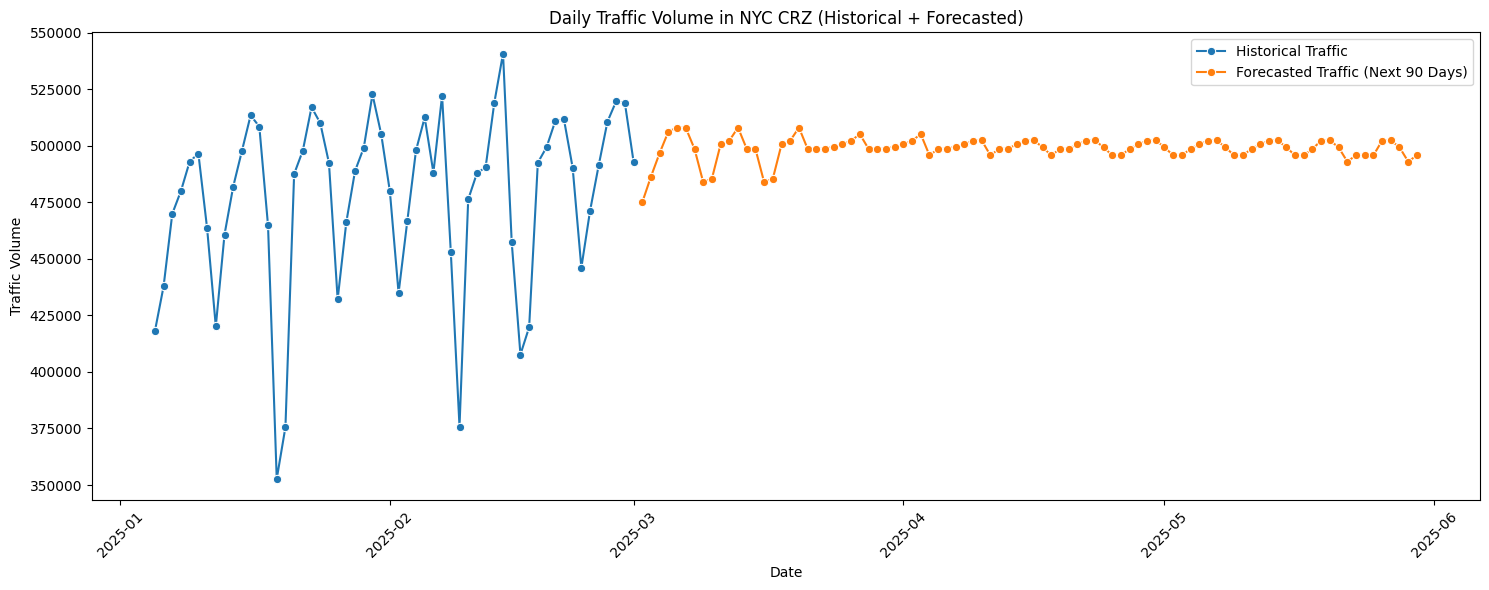

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Filter post-CRZ and convert date
crz_data = combined_crz_traffic_filtered[combined_crz_traffic_filtered['Date'] >= '2025-01-01'].copy()
crz_data['Date'] = pd.to_datetime(crz_data['Date'])

# Aggregate traffic across streets per day
daily_traffic = crz_data.groupby('Date')['Count'].sum().reset_index()
daily_traffic['day_of_week'] = daily_traffic['Date'].dt.dayofweek
daily_traffic['month'] = daily_traffic['Date'].dt.month
daily_traffic['day_of_year'] = daily_traffic['Date'].dt.dayofyear
daily_traffic['time_index'] = (daily_traffic['Date'] - daily_traffic['Date'].min()).dt.days

X = daily_traffic[['day_of_week', 'month', 'day_of_year', 'time_index']]
y = daily_traffic['Count']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train the model (choose k = 7 for daily rhythm)
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_scaled, y)

# Generate 90 daily future dates
future_dates = pd.date_range(start=daily_traffic['Date'].max() + pd.Timedelta(days=1), periods=90)
future_df = pd.DataFrame({'Date': future_dates})

# Create same features
future_df['day_of_week'] = future_df['Date'].dt.dayofweek
future_df['month'] = future_df['Date'].dt.month
future_df['day_of_year'] = future_df['Date'].dt.dayofyear
future_df['time_index'] = (future_df['Date'] - daily_traffic['Date'].min()).dt.days

# Scale and predict
X_future = scaler.transform(future_df[['day_of_week', 'month', 'day_of_year', 'time_index']])
future_df['Count'] = knn.predict(X_future)

plt.figure(figsize=(15, 6))

# Historical
sns.lineplot(data=daily_traffic, x='Date', y='Count', label='Historical Traffic', marker='o')

# Forecast
sns.lineplot(data=future_df, x='Date', y='Count', label='Forecasted Traffic (Next 90 Days)', marker='o')

plt.title("Daily Traffic Volume in NYC CRZ (Historical + Forecasted)")
plt.xlabel("Date")
plt.ylabel("Traffic Volume")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

We also made another model to analyze another aspect of the data: toll rates and revenue. Therefore the model fails to predict that far in the future.
We assigned toll rates to certain times of the day and days of the week, derived from this map: [Congestion Relief Zone Pricing Map](https://www.mta.info/document/138931). Taxis and for-hire vehicles are exempt from tolls.  It begins by copying the original dataset and converting toll timestamps to datetime format. It then classifies each entry as either "Peak" or "Overnight" based on the day of the week and hour of the toll. Next, it extracts a numeric vehicle class or marks the entry as "TLC" if it's a rideshare. Toll rates are assigned based on vehicle class and time period using a predefined dictionary. The script computes total revenue per entry by multiplying the number of entries by the toll rate, and finally aggregates total daily entries and revenue. The result is a summarized daily revenue dataset printed for review.

In [ ]:
import pandas as pd

# Load data

# Create a copy and parse datetime
CRZ_time_df = CRZ_df.copy()
CRZ_time_df['Date'] = pd.to_datetime(CRZ_time_df['Toll Date'], errors='coerce')

# Determine if Peak or Overnight
CRZ_time_df['Period'] = CRZ_time_df.apply(lambda row:
    'Peak' if ((row['Date'].weekday() < 5 and 5 <= row['Date'].hour < 21) or
              (row['Date'].weekday() >= 5 and 9 <= row['Date'].hour < 21))
    else 'Overnight', axis=1)

# Extract numeric class ID or TLC
CRZ_time_df['Class ID'] = CRZ_time_df['Vehicle Class'].apply(
    lambda vc: "TLC" if pd.notna(vc) and vc.startswith("TLC") else
              int(vc.split(" ")[0]) if pd.notna(vc) and vc[0].isdigit() else None)

# Assign Toll Rate
tolls = {
    1: {'Peak': 9.00, 'Overnight': 2.25},
    2: {'Peak': 14.40, 'Overnight': 3.60},
    3: {'Peak': 21.60, 'Overnight': 5.40},
    4: {'Peak': 14.40, 'Overnight': 3.60},
    5: {'Peak': 4.50, 'Overnight': 1.05}
}

CRZ_time_df['Toll Rate'] = CRZ_time_df.apply(
    lambda row: 0 if row['Class ID'] == "TLC" else
               tolls.get(row['Class ID'], {}).get(row['Period'], 0), axis=1)

# Calculate Revenue
CRZ_time_df['CRZ Entries'] = pd.to_numeric(CRZ_time_df['CRZ Entries'], errors='coerce')
CRZ_time_df['Revenue'] = CRZ_time_df['Toll Rate'] * CRZ_time_df['CRZ Entries']

# Aggregate daily data
daily_data = CRZ_time_df.groupby(CRZ_time_df['Date'].dt.date).agg({
    'CRZ Entries': 'sum',
    'Revenue': 'sum'
}).reset_index()
daily_data['Date'] = pd.to_datetime(daily_data['Date'])

# Show results
print("Daily Revenue Data:")
print(daily_data.head())

Daily Revenue Data:
        Date  CRZ Entries    Revenue
0 2025-01-05       417981  607773.60
1 2025-01-06       437834  713039.25
2 2025-01-07       469961  756664.95
3 2025-01-08       480103  758992.80
4 2025-01-09       493076  763024.80


Finally, we build another model to predict the revenue of the project in the future. This code builds a K-Nearest Neighbors regression model to forecast daily revenue from NYC's Congestion Relief Zone (CRZ) tolls over the next 90 days. It starts by creating calendar-based features (e.g., day of week, weekend flag) and combines them with historical traffic counts to predict revenue. After scaling the data, the model is trained using distance-weighted KNN with an optimal value for k. To forecast, the code generates features for 90 future dates, estimates traffic volume using average weekly patterns, and predicts revenue for each day. It then visualizes historical vs. forecasted revenue and the relationship between traffic volume and revenue. Finally, it prints a summary of the forecast including daily averages, totals, and breakdowns by weekday and month.

The initial goal was to build a model that can provide a day where NYC turns a profit from the project. However since the project was made to fund 15 Billion dollars of MTA projects, I estimated the city will turn a profit in 52 years.

The top chart shows a similar trend as before, a decrease in revenue over the next 90 days. This confirms our hypothesis that the policy worked. This is because the bottom chart shows a positive correlation between traffic volume and revenue earned, which makes sense since if traffic goes up, revenue goes up, and if traffic goes down, revenue goes down.

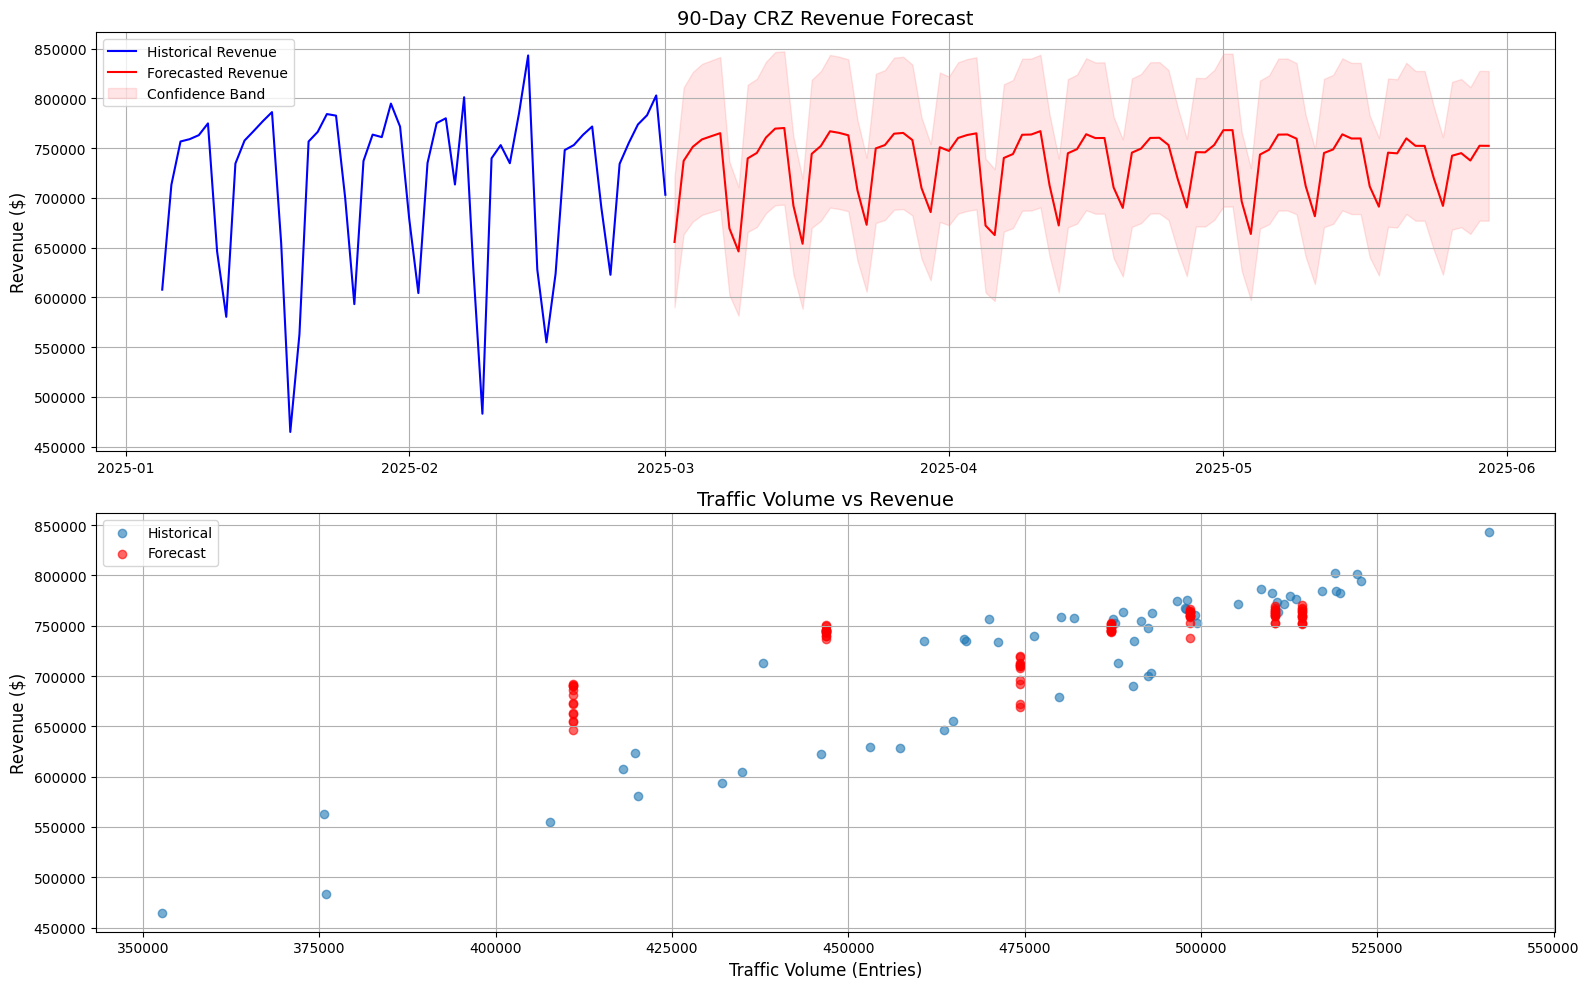


=== 90-Day Revenue Forecast Summary ===
Average Daily Revenue: $736266.33
Total Projected Revenue: $66263969.37
Peak Day Revenue: $770204.49
Minimum Day Revenue: $646197.42

=== Weekly Breakdown ===
Date
Thursday     761955.422540
Friday       761017.670434
Wednesday    759727.101418
Tuesday      747992.957373
Monday       744188.866792
Saturday     702716.377861
Sunday       673685.122528
Name: Revenue, dtype: float64

=== Monthly Breakdown ===
Date
April    2.213478e+07
March    2.198585e+07
May      2.214334e+07
Name: Revenue, dtype: float64


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Create calendar-based features
daily_data['day_of_week'] = daily_data['Date'].dt.dayofweek
daily_data['day_of_month'] = daily_data['Date'].dt.day
daily_data['month'] = daily_data['Date'].dt.month
daily_data['is_weekend'] = daily_data['day_of_week'].isin([5, 6]).astype(int)
daily_data['time_index'] = (daily_data['Date'] - daily_data['Date'].min()).dt.days

# 2. Prepare features and target
features = ['day_of_week', 'day_of_month', 'month', 'is_weekend', 'time_index', 'CRZ Entries']
X = daily_data[features]
y = daily_data['Revenue']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train KNN model with cross-validation
optimal_k = min(14, len(X_scaled)-1)  # Adjust based on data size
knn = KNeighborsRegressor(n_neighbors=optimal_k, weights='distance')
knn.fit(X_scaled, y)

# 4. Generate future 90 days forecast
future_dates = pd.date_range(start=daily_data['Date'].max() + pd.Timedelta(days=1), periods=90)
future_df = pd.DataFrame({'Date': future_dates})

# Create calendar features for future dates
future_df['day_of_week'] = future_df['Date'].dt.dayofweek
future_df['day_of_month'] = future_df['Date'].dt.day
future_df['month'] = future_df['Date'].dt.month
future_df['is_weekend'] = future_df['day_of_week'].isin([5, 6]).astype(int)
future_df['time_index'] = (future_df['Date'] - daily_data['Date'].min()).dt.days

# Estimate future traffic (using weekly patterns)
weekly_pattern = daily_data.groupby('day_of_week')['CRZ Entries'].mean()
future_df['CRZ Entries'] = future_df['day_of_week'].map(weekly_pattern)

# Prepare future features and scale
X_future = future_df[features]
X_future_scaled = scaler.transform(X_future)

# Predict future revenue
future_df['Revenue'] = knn.predict(X_future_scaled)

# 5. Enhanced Visualization (without histogram)
plt.figure(figsize=(16, 10))

# Historical vs Forecasted Revenue - Top Plot
plt.subplot(2, 1, 1)
plt.plot(daily_data['Date'], daily_data['Revenue'], 'b-', label='Historical Revenue')
plt.plot(future_df['Date'], future_df['Revenue'], 'r-', label='Forecasted Revenue')
plt.fill_between(future_df['Date'],
                 future_df['Revenue'] * 0.9,
                 future_df['Revenue'] * 1.1,
                 color='red', alpha=0.1, label='Confidence Band')
plt.title('90-Day CRZ Revenue Forecast', fontsize=14)
plt.ylabel('Revenue ($)', fontsize=12)
plt.legend()
plt.grid(True)

# Traffic-Revenue Relationship - Bottom Plot
plt.subplot(2, 1, 2)
plt.scatter(daily_data['CRZ Entries'], daily_data['Revenue'], alpha=0.6, label='Historical')
plt.scatter(future_df['CRZ Entries'], future_df['Revenue'], color='red', alpha=0.6, label='Forecast')
plt.xlabel('Traffic Volume (Entries)', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.title('Traffic Volume vs Revenue', fontsize=14)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 6. Forecast Summary
print("\n=== 90-Day Revenue Forecast Summary ===")
print(f"Average Daily Revenue: ${future_df['Revenue'].mean():.2f}")
print(f"Total Projected Revenue: ${future_df['Revenue'].sum():.2f}")
print(f"Peak Day Revenue: ${future_df['Revenue'].max():.2f}")
print(f"Minimum Day Revenue: ${future_df['Revenue'].min():.2f}")

print("\n=== Weekly Breakdown ===")
weekly_summary = future_df.groupby(future_df['Date'].dt.day_name())['Revenue'].mean().sort_values(ascending=False)
print(weekly_summary)

print("\n=== Monthly Breakdown ===")
monthly_summary = future_df.groupby(future_df['Date'].dt.month_name())['Revenue'].sum()
print(monthly_summary)

# **Insight and Policy Decision**

A final conclusion can be drawn that since the distribution of traffic has evened out across entry points—indicating no overwhelming congestion at any particular gateway—and the predictive models forecast a continued decrease in overall traffic volume, the policy has successfully mitigated congestion in Manhattan’s central business district.

This insight supports the hypothesis that financial disincentives (i.e., tolls during peak hours) can influence driver behavior, encouraging either route changes, shifts in travel times, or mode shifts to public transit. With empirical evidence showing both reduced volume and a more balanced traffic pattern, policymakers can justify the continuation or expansion of the CRZ initiative. Furthermore, these insights may inform complementary policies, such as targeted investments in transit infrastructure, refinement of toll rates based on vehicle class or time of day, or even the adaptation of similar congestion strategies in other densely populated urban areas. Ultimately, the data-driven analysis not only validates the original policy intent but also guides future urban planning and traffic management strategies.